# Logistic regression for diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

### 1. Load and prepare data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### 2. Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

print(f'Testing samples: {len(X_test)}')
print(f'Training samples: {len(X_train)}')

Testing samples: 154
Training samples: 614


## 3. Standardize Insulin (fit on train, transform both)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[['Insulin']])
X_test = scaler.transform(X_test[['Insulin']]) #Use same scaler

## 4. Train full model (all features)

In [6]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


## 5. Evaluation on TEST set

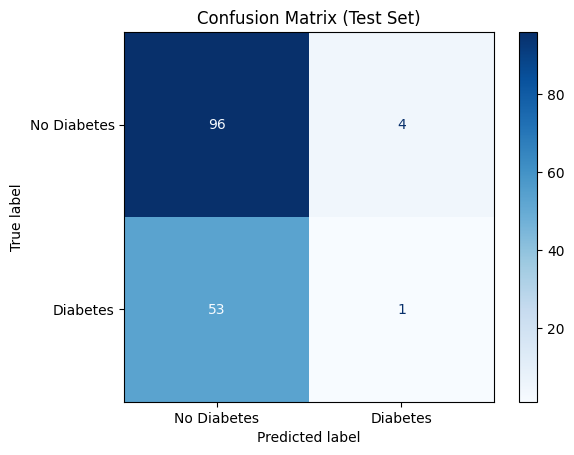

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       100
           1       0.20      0.02      0.03        54

    accuracy                           0.63       154
   macro avg       0.42      0.49      0.40       154
weighted avg       0.49      0.63      0.51       154



In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Diabetes", "Diabetes"]).plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()
print(classification_report(y_test, y_pred))

### 6. Logistic Regression Curve (Glucose only- for visualization)
Extract Glucose from train/test set.

In [39]:
X_train_glucose = X_train[["Glucose"]].copy()
X_test_glucose = X_test[['Glucose']].copy()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Train a separate single-feature model for visualization

In [38]:
model_glucose = LogisticRegression(max_iter=500)
model_glucose.fit(X_train_glucose, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[-7.07126706e-01  1.06759890e+00 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  1.29268605e+00 -7.07126706e-01
 -9.24656432e-02  9.37740927e-01 -7.07126706e-01 -7.07126706e-01
  4.18309043e-01 -4.90696754e-01 -7.07126706e-01  1.11088489e+00
 -7.07126706e-01 -8.38084451e-02 -9.24656432e-02 -7.07126706e-01
 -7.07126706e-01 -1.61723228e-01 -7.07126706e-01  1.58593101e-01
  3.75023052e-01 -7.07126706e-01 -2.82924001e-01 -7.07126706e-01
 -7.07126706e-01  1.58703078e+00  6.78024985e-01  1.15417088e+00
 -7.07126706e-01 -2.91581199e-01 -7.07126706e-01 -7.07126706e-01
 -2.74266803e-01 -7.07126706e-01 -7.07126706e-01  1.06649912e-01
  2.76353554e-03 -3.26209991e-01  3.31737062e-01 -7.07126706e-01
 -6.64940490e-02  3.31737062e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01  3.49051458e-01  2.01879091e-01 -1.01122841e-01
  5.17976798e+00 -7.07126706e-01 -7.07126706e-01  1.02431291e+00
 -1.01122841e-01  2.97108270e-01 -7.07126706e-01  1.37060083e+00
  3.70804431e+00 -7.07126706e-01  1.63897397e+00 -7.07126706e-01
  8.33854550e-01 -7.07126706e-01 -1.53066030e-01  4.61595033e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  3.31847040e+00 -5.51297141e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01  7.20211201e-02  1.06759890e+00  1.23964308e-01
 -7.07126706e-01  1.14207336e-02  8.51168946e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  4.09651845e-01 -7.07126706e-01  3.83680251e-01  9.72369719e-01
  2.64320895e+00  2.27850685e-01 -7.07126706e-01 -7.07126706e-01
 -4.91796529e-02 -7.07126706e-01  7.47282569e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  4.18309043e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -2.91581199e-01 -7.07126706e-01
 -7.07126706e-01  2.01879091e-01 -7.07126706e-01  1.14207336e-02
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01  2.45165081e-01
 -7.07126706e-01 -5.78368509e-02 -7.07126706e-01  6.78024985e-01
  1.08491329e+00  2.79793874e-01 -7.07126706e-01  4.48719213e+00
 -7.07126706e-01  3.31737062e-01 -7.07126706e-01 -7.07126706e-01
  3.44832837e+00 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01  2.01879091e-01
 -2.30980812e-01  5.73382866e+00 -7.07126706e-01  3.44832837e+00
 -7.07126706e-01 -7.07126706e-01 -2.13666416e-01 -7.07126706e-01
 -7.07126706e-01  5.04881023e-01  1.97660470e+00 -7.07126706e-01
 -7.07126706e-01  8.68483342e-01 -7.07126706e-01  1.76017474e+00
 -7.07126706e-01  4.18309043e-01 -7.07126706e-01 -3.78153179e-01
  2.01879091e-01 -7.07126706e-01 -7.07126706e-01  2.10646267e+00
  1.15417088e+00  2.87351297e-02  3.31737062e-01  6.34738995e-01
 -7.07126706e-01 -2.22323614e-01  5.56824212e-01  3.96776025e+00
 -7.07126706e-01  3.49051458e-01 -4.56067962e-01 -3.17552793e-01
 -7.07126706e-01 -6.64940490e-02  2.49603658e+00  1.24074286e+00
 -7.07126706e-01  7.47282569e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -2.22323614e-01  3.83680251e-01 -7.07126706e-01
  9.72369719e-01 -1.44408832e-01  6.43396193e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  1.58593101e-01 -7.07126706e-01
 -7.07126706e-01  3.31737062e-01  2.88561049e+00 -7.07126706e-01
 -2.05009218e-01  3.31737062e-01  8.06783182e-02 -7.07126706e-01
  7.38625371e-01 -5.51297141e-01  1.15307110e-01 -3.18652567e-02
 -7.07126706e-01 -4.05224548e-02  2.01879091e-01 -7.07126706e-01
  1.34462924e+00  9.63712521e-01  2.01879091e-01  1.71688875e+00
 -1.61723228e-01 -2.22323614e-01 -7.07126706e-01  4.61595033e-01
  8.85797738e-01 -7.07126706e-01 -4.91796529e-02 -7.07126706e-01
 -7.07126706e-01  8.93355162e-02 -7.07126706e-01  3.92337449e-01
  3.39638518e+00 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -3.17552793e-01 -7.07126706e-01  1.28402885e+00  8.51168946e-01
  1.81211793e+00 -7.07126706e-01 -7.07126706e-01 -9.24656432e-02
  8.07882956e-01 -7.07126706e-01  2.14974866e+00  1.82943233e+00
  8.51168946e-01 -7.07126706e-01 -7.07126706e-01  1.06649912e-01
 -3.86810378e-01 -7.07126706e-01  1.69091716e+00 -7.07126706e-01
  1.49935903e-01 -7.07126706e-01  6.78024985e-01 -1.35751634e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01  3.31737062e-01
 -7.07126706e-01  8.51168946e-01 -7.07126706e-01 -3.86810378e-01
 -7.07126706e-01 -7.07126706e-01  1.02431291e+00 -7.07126706e-01
 -2.32080587e-02 -7.07126706e-01 -7.07126706e-01  1.45717281e+00
 -1.79037624e-01  2.88451072e-01 -7.07126706e-01 -2.32080587e-02
 -7.07126706e-01 -2.82924001e-01 -2.82924001e-01 -7.07126706e-01
 -7.07126706e-01  1.19745687e+00  3.23079864e-01  2.04586228e+00
 -7.07126706e-01 -7.07126706e-01  1.58593101e-01  7.20211201e-02
  2.76353554e-03 -7.51512471e-02  1.06649912e-01 -7.07126706e-01
 -7.07126706e-01  1.11088489e+00 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  3.57818634e+00 -4.05224548e-02
 -5.89366253e-03  4.18309043e-01  8.93355162e-02 -2.22323614e-01
  4.18309043e-01 -7.07126706e-01 -1.18437237e-01  1.37060083e+00
  5.91453004e-01  5.39509816e-01  3.31737062e-01 -7.07126706e-01
  1.05894170e+00  1.75151755e+00 -7.07126706e-01 -5.68611537e-01
  3.57818634e+00  1.19745687e+00  4.18309043e-01  5.39509816e-01
  9.89684115e-01  6.34738995e-01 -2.82924001e-01 -7.07126706e-01
 -7.07126706e-01  3.10204044e+00 -7.07126706e-01 -7.07126706e-01
  4.18309043e-01 -3.95467576e-01 -7.07126706e-01  7.21310975e-01
 -7.07126706e-01 -1.35751634e-01 -1.61723228e-01 -7.07126706e-01
 -2.48295208e-01 -7.07126706e-01 -7.07126706e-01  2.53932257e+00
  7.64596966e-01 -7.07126706e-01 -2.39638010e-01  6.34738995e-01
 -5.08011150e-01 -7.07126706e-01  5.04881023e-01 -7.07126706e-01
  7.21310975e-01  7.47282569e-01 -7.07126706e-01  5.22195420e-01
  2.88451072e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  2.88451072e-01 -7.07126706e-01 -7.07126706e-01  7.21310975e-01
 -7.07126706e-01  9.20426531e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01  1.15417088e+00
  2.45165081e-01 -7.07126706e-01 -2.39638010e-01 -7.07126706e-01
 -5.08011150e-01 -7.07126706e-01  2.97108270e-01 -3.26209991e-01
  4.18309043e-01  1.89003271e+00  1.15307110e-01  8.51168946e-01
 -2.39638010e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  2.76353554e-03  6.08767400e-01 -7.07126706e-01 -7.07126706e-01
  7.47282569e-01  1.50045880e+00  5.04881023e-01  5.04881023e-01
 -7.07126706e-01  8.16540154e-01 -7.07126706e-01 -1.87694822e-01
  5.48167014e-01 -3.95467576e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  4.35623439e-01  6.78024985e-01 -7.07126706e-01 -7.07126706e-01
  4.00994647e-01  2.11511986e+00  2.10646267e+00 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  2.88451072e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  3.75023052e-01  8.68483342e-01  4.60495259e-02 -7.07126706e-01
  1.06649912e-01  8.77140540e-01  4.61595033e-01  9.55055323e-01
 -7.07126706e-01  3.75023052e-01 -2.74266803e-01 -3.43524387e-01
  1.58593101e-01 -7.07126706e-01  1.66494556e+00  5.48167014e-01
 -7.07126706e-01 -7.07126706e-01 -3.08895595e-01 -7.07126706e-01
  1.06649912e-01 -7.07126706e-01 -5.78368509e-02 -2.30980812e-01
 -7.07126706e-01  2.00779317e-02 -7.07126706e-01 -3.34867189e-01
 -2.39638010e-01 -7.07126706e-01  9.46398125e-01 -7.07126706e-01
  8.07882956e-01 -7.07126706e-01 -1.35751634e-01  1.28402885e+00
 -3.60838783e-01  6.33639220e-02  2.68649494e+00 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01  6.43396193e-01
 -7.07126706e-01  1.41388682e+00 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -4.30096368e-01 -5.77268735e-01
  1.02431291e+00 -7.07126706e-01  5.47067239e-02 -7.07126706e-01
  5.47067239e-02 -7.07126706e-01  2.01879091e-01 -7.07126706e-01
 -7.07126706e-01  7.21310975e-01  7.29968173e-01  4.61595033e-01
 -7.07126706e-01 -2.56952407e-01 -7.07126706e-01  1.63031677e+00
  4.60495259e-02 -7.07126706e-01  2.01879091e-01  3.99373184e+00
  9.72369719e-01 -2.48295208e-01  2.88451072e-01  5.74138608e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  2.10536289e-01 -7.07126706e-01
 -4.91796529e-02 -7.07126706e-01 -7.07126706e-01  9.37740927e-01
  8.94454937e-01 -2.22323614e-01  5.04881023e-01  1.64763117e+00
 -2.91581199e-01 -7.07126706e-01 -7.07126706e-01 -2.82924001e-01
  4.01104624e+00  1.14207336e-02 -7.07126706e-01  5.47067239e-02
 -7.07126706e-01  5.91453004e-01 -7.07126706e-01  1.52643040e+00
  4.30539098e+00 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -2.13666416e-01  5.04881023e-01 -7.07126706e-01
  7.38625371e-01  2.07183387e+00 -7.07126706e-01  1.11088489e+00
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01  7.20211201e-02  7.64596966e-01 -7.07126706e-01
  8.68483342e-01 -7.07126706e-01 -7.07126706e-01  8.16540154e-01
  9.55055323e-01 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
  6.69367787e-01 -7.07126706e-01  4.61595033e-01 -7.07126706e-01
 -3.60838783e-01 -7.07126706e-01  5.04881023e-01  2.10536289e-01
  1.24074286e+00 -7.07126706e-01 -7.07126706e-01 -5.78368509e-02
 -7.07126706e-01  1.44851561e+00 -7.07126706e-01 -7.07126706e-01
  2.40946460e+00 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01  2.01879091e-01 -7.07126706e-01  2.62479478e-01
  9.37740927e-01  2.13243426e+00 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01 -7.07126706e-01  1.06649912e-01
 -7.07126706e-01 -7.07126706e-01  3.75023052e-01  6.34738995e-01
 -7.07126706e-01  2.79793874e-01 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01  1.06649912e-01  1.11088489e+00 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01  4.61595033e-01  2.25363503e+00
  1.58593101e-01 -7.07126706e-01 -7.07126706e-01 -3.26209991e-01
  6.60710589e-01  3.43101397e+00 -7.07126706e-01 -7.07126706e-01
 -7.07126706e-01 -7.07126706e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Create smooth curve

In [36]:
glucose_min = df['Glucose'].min()
glucose_max = df['Glucose'].max()
glucose_values = np.linspace(glucose_min, glucose_max, 200).reshape(-1, 1)
y_curve = model_glucose.predict(glucose_values)[:,1]

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Plot sigmoid curve with train/test split visualization

AttributeError: PathCollection.set() got an unexpected keyword argument 'aplha'

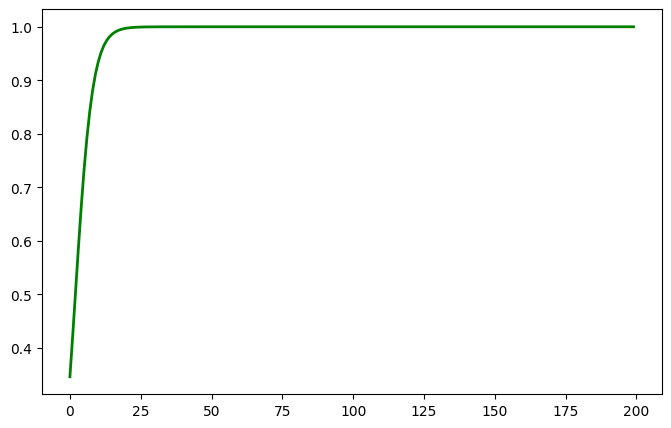

In [37]:
plt.figure(figsize=(8,5))
plt.plot(glucose_values, y_curve, color='green', linewidth=2, label='Logistic Curve')
plt.scatter(X_train_glucose, y_train, color='blue', aplha = 0.5, label='Training Data')
plt.scatter(X_test_glucose, y_test, color='red', alpha=0.6, marker='x', s=80, label='Test Data')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes(Outcome=1)')
plt.title('Logistic Regression Curve - Glucose Feature Only')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()